In [57]:
#-----------------------------------------------------------------------
# Librerías y algunas variables
#-----------------------------------------------------------------------
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  
import random

color = ['green', 'blue','red','cyan', 'magenta', 'yellow','brown','k']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#-----------------------------------------------------------------------
# Funciones DrugSignal
#-----------------------------------------------------------------------
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            # Acá debe ir un random.choice que llame a los 5 distintos tipos de templates ERP. 
            # coefERP = random.choice(vCoefERP)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
    return signal

#-----------------------------------------------------------------------
# Carga de archivos para proceso de señales
#-----------------------------------------------------------------------
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete(erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete(erptemplate2, range(0,256,43),0)
df_erptemplate1 = a_fun.to_df(erptemplate1)

#-----------------------------------------------------------------------
# Vector random entre 0.5*ERP y 1.5*ERP. | Uso temporalmente el fijo para darme cuenta.   
#-----------------------------------------------------------------------
v_min = erptemplate1.min()*0.5
v_max = erptemplate1.max()*0.5
v_aleatorio = np.random.uniform(v_min, v_max, (1, 8)) # B = np.random.rand(1, 8) Array B de dim (1, 8) con valores aleatorios
# v_aleatorio = [-5,1,5,0,5,0,5,0] # Vector fijo para testing
DrugAmpERPtemplate = np.empty_like(erptemplate1) # Inicializo un array igual que erptemplate1
for j in range(erptemplate1.shape[0]):
    DrugAmpERPtemplate[j, :] = erptemplate1[j, :] + v_aleatorio
df_DrugAmpERPtemplate = a_fun.to_df(DrugAmpERPtemplate)

ch_names=['Fz','Cz','P3','Pz','P4','PO7','PO8', 'Oz'] # Nombres de los canales

print(f'Valor mínimo del ERPTemplate: ',erptemplate1.min())
print(f'Valor máximo del ERPTemplate: ',erptemplate1.max())
print(f'Valor mínimo del DrugAmpERPTemplate',DrugAmpERPtemplate.min())
print(f'Valor máximo del DrugAmpERPTemplate ',DrugAmpERPtemplate.max())
print(f'Resultado del vector aleatorio: ',v_aleatorio)


Valor mínimo del ERPTemplate:  -4.248038168736751
Valor máximo del ERPTemplate:  6.257030433692501
Valor mínimo del DrugAmpERPTemplate -4.141725369904987
Valor máximo del DrugAmpERPTemplate  6.7300437289927935
Resultado del vector aleatorio:  [[-1.08659109 -0.20144884  2.18472246 -1.38854755 -1.83606989  0.57684175
   1.07707651  1.85337536]]


In [31]:
df_erptemplate1.describe()

,0,1,2,3,4,5,6,7,sample
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.002158,0.000344,-0.002322,-0.000856,-0.003703,-0.000859,-0.001580,0.000002,124.500000
std,2.362681,2.338688,1.963248,1.223330,1.802684,1.995494,2.092276,1.689276,72.312977
min,-2.712559,-2.979053,-2.571040,-2.468619,-2.305655,-2.880537,-4.248038,-3.388361,0.000000
25%,-1.532254,-1.787201,-1.481595,-0.646537,-1.499948,-1.236726,-1.116989,-0.907802,62.250000
50%,-0.583431,-0.465176,-0.320567,-0.149560,-0.390686,-0.442355,0.166711,-0.191079,124.500000
75%,0.394518,0.630838,0.354147,0.637499,0.388465,0.245686,1.000770,0.975075,186.750000
max,6.257030,5.827076,4.545321,2.406912,4.092072,4.661640,3.786213,2.749797,249.000000


In [32]:
df_DrugAmpERPtemplate.describe()

,0,1,2,3,4,5,6,7,sample
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,-0.470112,0.927939,-0.840594,0.208313,2.897770,-0.031346,-2.031926,0.007243,124.500000
std,2.362681,2.338688,1.963248,1.223330,1.802684,1.995494,2.092276,1.689276,72.312977
min,-3.184830,-2.051458,-3.409312,-2.259450,0.595818,-2.911023,-6.278384,-3.381120,0.000000
25%,-2.004524,-0.859607,-2.319867,-0.437368,1.401526,-1.267213,-3.147335,-0.900561,62.250000
50%,-1.055702,0.462419,-1.158840,0.059609,2.510787,-0.472841,-1.863635,-0.183838,124.500000
75%,-0.077753,1.558433,-0.484125,0.846668,3.289938,0.215200,-1.029576,0.982316,186.750000
max,5.784760,6.754671,3.707049,2.616081,6.993546,4.631154,1.755867,2.757038,249.000000


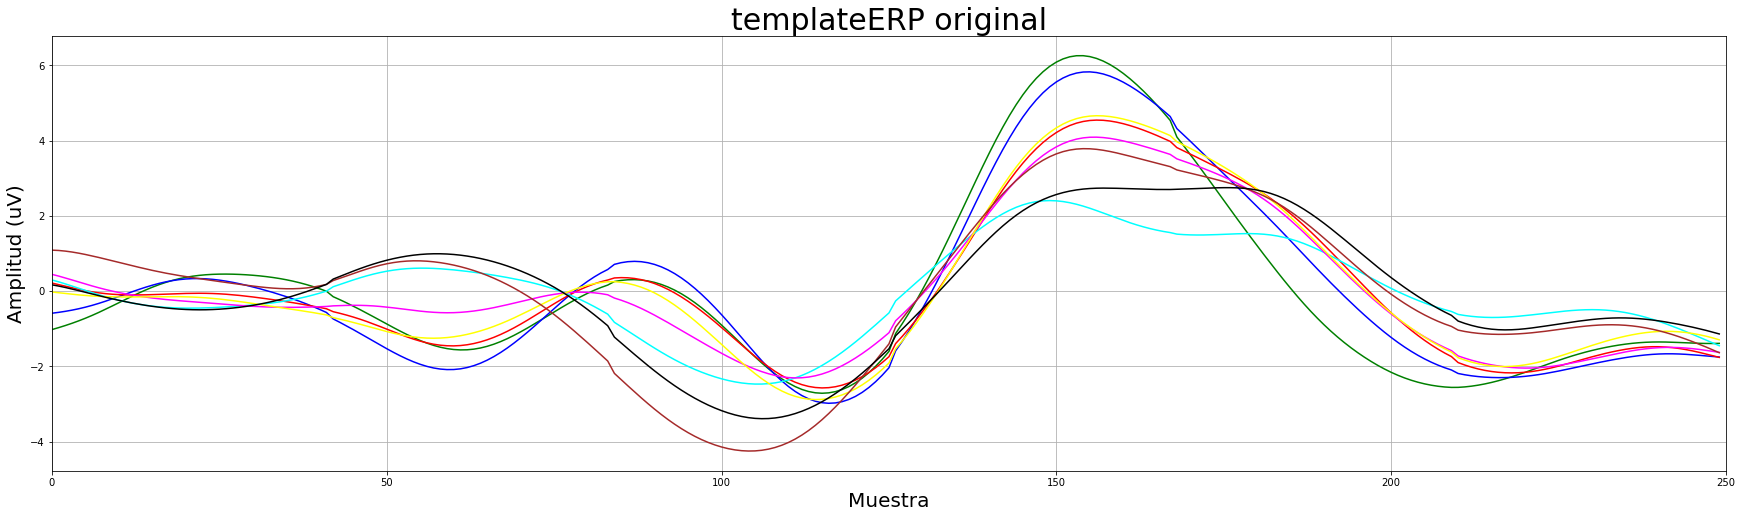

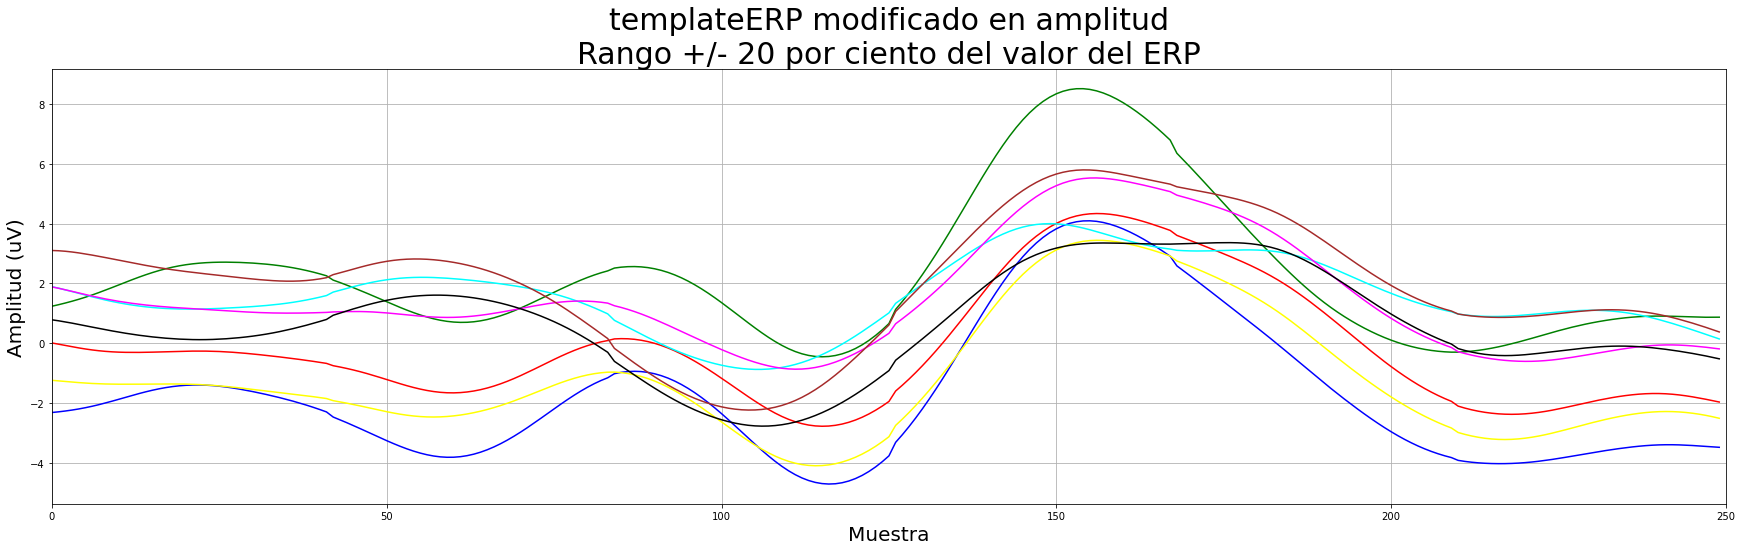

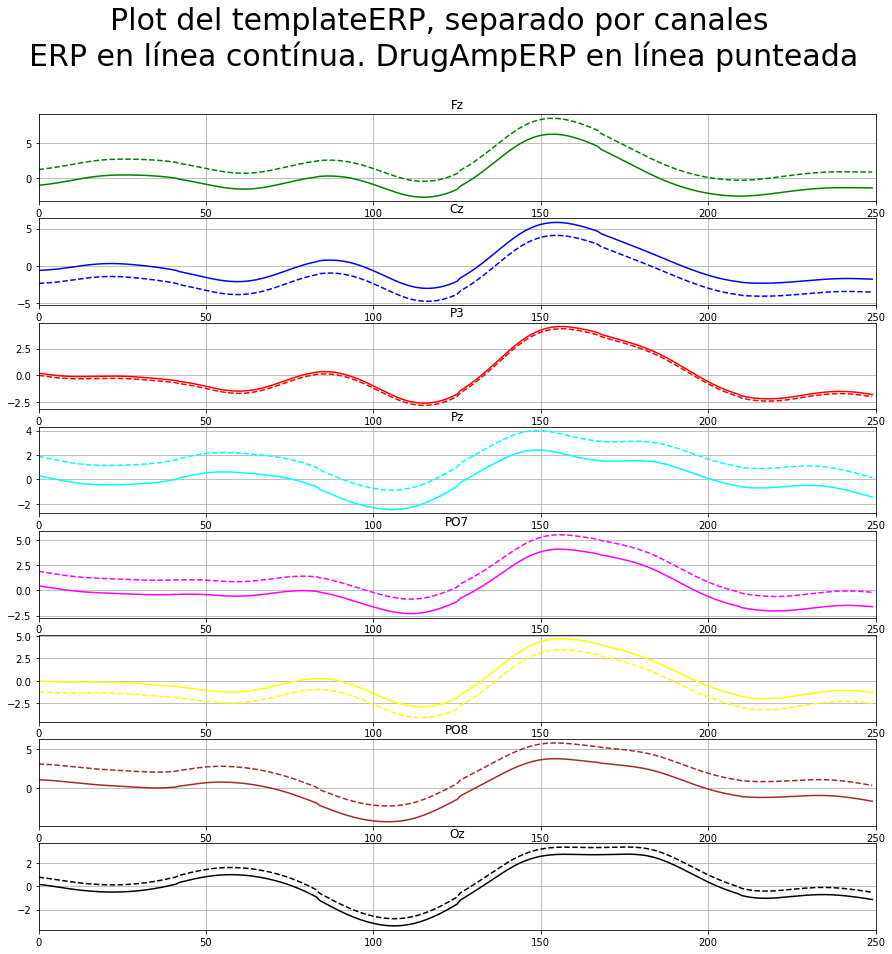

In [56]:
#-----------------------------------------------------------------------
# Plot del templateERP completo
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,8):
    plt.plot(df_erptemplate1['sample'], df_erptemplate1[i], color[i])     
axes.set_title('templateERP original'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/ERPTemplate.jpg")
#plt.axis((0,250,-6,8))  
plt.xlim([0,250]) #plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP modificado
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,8):
    plt.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate[i], color[i])     
axes.set_title('templateERP modificado en amplitud\nRango +/- 20 por ciento del valor del ERP'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/ERPTemplate.jpg")
#plt.axis((0,250,-6,8))  
plt.xlim([0,250]) #plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP, separado por canales
#-----------------------------------------------------------------------
# color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
# ch_names=['Fz','Cz','P3','Pz','P4','PO7','PO8', 'Oz'] # Nombres de los canales
xlim_general=([0,250])
ylim_general=([-6,8])
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, ncols=1,figsize=(15,15))
fig.suptitle('Plot del templateERP, separado por canales \nERP en línea contínua. DrugAmpERP en línea punteada', fontsize=30)

ax0.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,0], label='0', color='green')
ax0.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,0], label='0',  color='green', linestyle='--')
ax0.set_xlim(xlim_general), '''ax0.set_ylim(ylim_general)''', ax0.set_title(ch_names[0]), ax0.grid()

ax1.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,1], label='1', color='blue') 
ax1.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,1], label='1', color='blue', linestyle='--')
ax1.set_xlim(xlim_general), '''ax1.set_ylim(ylim_general)''', ax1.set_title(ch_names[1]), ax1.grid()

ax2.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,2], label='2', color='red') 
ax2.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,2], label='2', color='red', linestyle='--')
ax2.set_xlim(xlim_general), '''ax2.set_ylim(ylim_general)''', ax2.set_title(ch_names[2]), ax2.grid()

ax3.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,3], label='3', color='cyan') 
ax3.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,3], label='3', color='cyan', linestyle='--')
ax3.set_xlim(xlim_general), '''ax3.set_ylim(ylim_general)''', ax3.set_title(ch_names[3]), ax3.grid()

ax4.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,4], label='4', color='magenta') 
ax4.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,4], label='4', color='magenta', linestyle='--')
ax4.set_xlim(xlim_general), '''ax4.set_ylim(ylim_general)''', ax4.set_title(ch_names[4]), ax4.grid()

ax5.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,5], label='5', color='yellow') 
ax5.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,5], label='5', color='yellow', linestyle='--')
ax5.set_xlim(xlim_general), '''ax5.set_ylim(ylim_general)''', ax4.set_title(ch_names[5]), ax5.grid()

ax6.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,6], label='6', color='brown') 
ax6.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,6], label='6', color='brown', linestyle='--')
ax6.set_xlim(xlim_general), '''ax6.set_ylim(ylim_general)''', ax6.set_title(ch_names[6]), ax6.grid()

ax7.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,7], label='7', color='k') 
ax7.plot(df_DrugAmpERPtemplate['sample'], df_DrugAmpERPtemplate.iloc[:,7], label='7', color='k', linestyle='--')
ax7.set_xlim(xlim_general), '''ax7.set_ylim(ylim_general)''', ax7.set_title(ch_names[7]), ax7.grid()

plt.show()

In [ ]:
'''
#-----------------------------------------------------------------------
# Plot de la señal drogada completa.
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                     
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('P300, "sujeto25". Señal drogada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/DrugSignal_p300subject25[data][0][0][0].jpg")
plt.grid(), plt.show()
'''
#-----------------------------------------------------------------------
# Plot de la señal drogada: zoom hasta un P300
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                     
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Plot de la señal drogada: zoom hasta un P300'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/DrugSignal_p300subject25[data][0][0][0].jpg")
plt.axis((117800,118050,-100,150))   
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot de la señal drogada, separada por canales
#-----------------------------------------------------------------------
xlim_general=([117800,118050])
ylim_general=([-100,150])
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, ncols=1,figsize=(30,20))
fig.suptitle("Plot de la señal drogada, separada por canales", fontsize=30)

ax0.plot(df_signal['sample'], df_signal.iloc[:,0], label='0') 
ax0.set_xlim(xlim_general), ax0.set_ylim(ylim_general), ax0.set_title(ch_names[0]), ax0.grid()

ax1.plot(df_signal['sample'], df_signal.iloc[:,1], label='1')
ax1.set_xlim(xlim_general), ax1.set_ylim(ylim_general), ax1.set_title(ch_names[1]), ax1.grid()

ax2.plot(df_signal['sample'], df_signal.iloc[:,2], label='2')
ax2.set_xlim(xlim_general), ax2.set_ylim(ylim_general), ax2.set_title(ch_names[2]), ax2.grid()

ax3.plot(df_signal['sample'], df_signal.iloc[:,3], label='3')
ax3.set_xlim(xlim_general), ax3.set_ylim(ylim_general), ax3.set_title(ch_names[3]), ax3.grid()

ax4.plot(df_signal['sample'], df_signal.iloc[:,4], label='4')
ax4.set_xlim(xlim_general), ax4.set_ylim(ylim_general), ax4.set_title(ch_names[4]), ax4.grid()

ax5.plot(df_signal['sample'], df_signal.iloc[:,5], label='5')
ax5.set_xlim(xlim_general), ax5.set_ylim(ylim_general), ax4.set_title(ch_names[5]), ax5.grid()

ax6.plot(df_signal['sample'], df_signal.iloc[:,6], label='6')
ax6.set_xlim(xlim_general), ax6.set_ylim(ylim_general), ax6.set_title(ch_names[6]), ax6.grid()

ax7.plot(df_signal['sample'], df_signal.iloc[:,7], label='7')
ax7.set_xlim(xlim_general), ax7.set_ylim(ylim_general), ax7.set_title(ch_names[7]), ax7.grid()

plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP completo
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,7):
    plt.plot(df_erptemplate1['sample'], df_erptemplate1[i], color[i])
axes.set_title('Plot del templateERP completo'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/ERPTemplate.jpg")
plt.axis((0,250,-6,8))  #plt.xlim([0,100]), plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP, separado por canales
#-----------------------------------------------------------------------
xlim_general=([0,250])
ylim_general=([-6,8])
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, ncols=1,figsize=(30,20))
fig.suptitle("Plot del templateERP, separado por canales", fontsize=30)

ax0.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,0], label='0') 
ax0.set_xlim(xlim_general), ax0.set_ylim(ylim_general), ax0.set_title(ch_names[0]), ax0.grid()

ax1.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,1], label='1')
ax1.set_xlim(xlim_general), ax1.set_ylim(ylim_general), ax1.set_title(ch_names[1]), ax1.grid()

ax2.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,2], label='2')
ax2.set_xlim(xlim_general), ax2.set_ylim(ylim_general), ax2.set_title(ch_names[2]), ax2.grid()

ax3.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,3], label='3')
ax3.set_xlim(xlim_general), ax3.set_ylim(ylim_general), ax3.set_title(ch_names[3]), ax3.grid()

ax4.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,4], label='4')
ax4.set_xlim(xlim_general), ax4.set_ylim(ylim_general), ax4.set_title(ch_names[4]), ax4.grid()

ax5.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,5], label='5')
ax5.set_xlim(xlim_general), ax5.set_ylim(ylim_general), ax4.set_title(ch_names[5]), ax5.grid()

ax6.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,6], label='6')
ax6.set_xlim(xlim_general), ax6.set_ylim(ylim_general), ax6.set_title(ch_names[6]), ax6.grid()

ax7.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,7], label='7')
ax7.set_xlim(xlim_general), ax7.set_ylim(ylim_general), ax7.set_title(ch_names[7]), ax7.grid()

plt.show()


'''
plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[0])
axes.set_title('Señal t_flash[0]: Incremental'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Señal t_flash[3] completa'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Zoom señal t_flash[3]'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([0,100]), plt.ylim([0.9,2.1])
plt.grid(), plt.show()
'''

En la siguientes gráficas modifico el erptemplate1 multiplicándolo por 50 dentro de la función DrugSignal.  
El objetivo es visualizar en dónde afecta la señal.    

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])                                                           
axes.set_title('DrugSignal p300subject25[data][0][0][0] + ERPTemplate amplificado'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([8550,8950]), plt.ylim([-600,800])
plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100_zoom.jpg")
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])              
axes.set_title('Señal p300subject25[data][0][0][0] drogada con el ERPTemplate'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/DrguSignal2.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([228000,236000]), plt.ylim([-800,1000])
plt.savefig("./a_images/DrguSignal2_zoom.jpg")
plt.grid(), plt.show()